In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Without PCA

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

In [13]:
df.shape

(42000, 785)

In [14]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2682,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39291,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5245,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22146,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6366,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import matplotlib.pyplot as plt

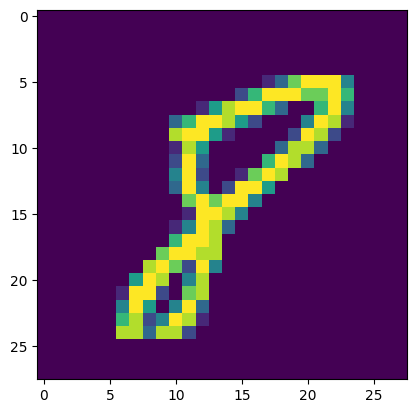

In [16]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X= df.iloc[:,1:]
y= df.iloc[:,0]

In [52]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [19]:
X_train.shape

(33600, 784)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn= KNeighborsClassifier()

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
import time
start= time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

20.278244018554688


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

# With PCA

In [25]:
# Step1. Standardized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [28]:
X_train_trf= pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [29]:
X_train.shape

(33600, 784)

In [30]:
X_train_trf.shape

(33600, 100)

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test_trf)

In [34]:
accuracy_score(y_test,y_pred)

0.1488095238095238

# Visualizing the data in different dimentions

In [35]:
# Transforming to a 2D coordinate system
pca=PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [36]:
X_train_trf

array([[-2.71864711, -0.48996756],
       [-0.67715063, -6.75438174],
       [-3.03328796,  6.51052596],
       ...,
       [ 2.1487831 ,  0.78094223],
       [ 1.05965358,  0.94777583],
       [17.70250296,  1.96163936]])

In [37]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

In [38]:
# Transforming to a 3D coordinate system
pca=PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [39]:
X_train_trf

array([[-2.71864869, -0.48999192,  1.13555256],
       [-0.67702727, -6.75402927, -2.33586808],
       [-3.03320345,  6.51004602,  7.49182081],
       ...,
       [ 2.14884754,  0.78071954, -0.74784477],
       [ 1.05956605,  0.94767913,  3.9499164 ],
       [17.70256312,  1.9619163 , -4.9433035 ]])

In [40]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(
margin = dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [41]:
# Eigen Values or lambda
pca.explained_variance_

array([692.55228737, 139.53877134,  41.34548258])

In [42]:
# Eigen Vectors
pca.components_

array([[-6.93258731e-26,  8.07800424e-29, -3.11925448e-28, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-6.24123048e-21, -2.77756029e-23,  1.20500083e-22, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.39278690e-19,  6.86178658e-19, -2.57618304e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [43]:
pca.components_.shape

(3, 784)

In [44]:
pca=PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [45]:
pca.explained_variance_.shape

(784,)

In [46]:

pca.components_.shape

(784, 784)

In [47]:
pca.explained_variance_ratio_

array([4.40854130e-01, 8.88254141e-02, 2.63190623e-02, 1.86157979e-02,
       1.74700328e-02, 1.62098131e-02, 1.31478863e-02, 1.15233292e-02,
       1.00489759e-02, 8.85046974e-03, 8.24429346e-03, 7.41444388e-03,
       7.06481442e-03, 6.62723499e-03, 6.58124174e-03, 6.32964080e-03,
       5.93594815e-03, 5.83019972e-03, 5.63196074e-03, 5.54500120e-03,
       5.24201298e-03, 5.05469785e-03, 4.90648150e-03, 4.83042084e-03,
       4.68048667e-03, 4.51565703e-03, 4.41262453e-03, 4.09597656e-03,
       4.03773467e-03, 3.91515054e-03, 3.79534483e-03, 3.68174773e-03,
       3.51897665e-03, 3.38347337e-03, 3.30251117e-03, 3.22730991e-03,
       3.13613942e-03, 3.02779414e-03, 2.93955646e-03, 2.84054728e-03,
       2.82222423e-03, 2.80518467e-03, 2.69552057e-03, 2.65916251e-03,
       2.64513621e-03, 2.53917205e-03, 2.49073584e-03, 2.46844629e-03,
       2.44032277e-03, 2.36825107e-03, 2.32908082e-03, 2.27841255e-03,
       2.20937828e-03, 2.17092729e-03, 2.11906907e-03, 2.09272372e-03,
      

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44085413, 0.52967954, 0.55599861, 0.5746144 , 0.59208444,
       0.60829425, 0.62144214, 0.63296547, 0.64301444, 0.65186491,
       0.66010921, 0.66752365, 0.67458846, 0.6812157 , 0.68779694,
       0.69412658, 0.70006253, 0.70589273, 0.71152469, 0.71706969,
       0.7223117 , 0.7273664 , 0.73227288, 0.7371033 , 0.74178379,
       0.74629945, 0.75071207, 0.75480805, 0.75884578, 0.76276093,
       0.76655628, 0.77023803, 0.773757  , 0.77714048, 0.78044299,
       0.7836703 , 0.78680644, 0.78983423, 0.79277379, 0.79561433,
       0.79843656, 0.80124174, 0.80393726, 0.80659643, 0.80924156,
       0.81178074, 0.81427147, 0.81673992, 0.81918024, 0.82154849,
       0.82387757, 0.82615598, 0.82836536, 0.83053629, 0.83265536,
       0.83474808, 0.83683309, 0.83886351, 0.84081051, 0.84275011,
       0.84466232, 0.84653634, 0.84838243, 0.85016293, 0.85193234,
       0.85369586, 0.85541788, 0.85708229, 0.85872741, 0.86035976,
       0.86193664, 0.86350778, 0.86506727, 0.86657887, 0.86807

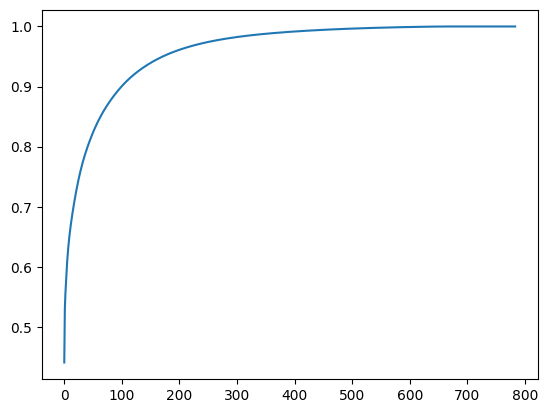

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))